# Python segmentation integration test

Make some test data for segmentation and test algorithm implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

np.random.seed(12348)

# Set up constants

In [2]:
# duration stuff

T = 5  # total duration (in s)
dt = 0.05  # bin size (in s)
Nt = int(np.ceil(T / dt))

mu = 0.5  # mean state duration (in s)
sig = 0.05  # standard deviation of state duration (in s)

In [3]:
# rates
lam = 1.  # baseline rate (Hz)
nu = 1000.  # rate multiplier (Hz)

# Make some intervals

In [4]:
durations = mu + sig * np.random.randn(Nt)
changepoints = np.cumsum(durations)
maxind = np.argwhere(changepoints > T)[0, 0]
changepoints = changepoints[:maxind]

In [5]:
changepoints / dt

array([ 11.3095624 ,  19.66190965,  29.58543266,  38.02284812,
        49.67895912,  57.83183378,  67.24225904,  78.0745227 ,
        87.89415731,  98.893017  ])

In [6]:
taxis = np.arange(0, T, dt)
states = np.zeros(Nt)
rates = lam * np.ones(Nt)

In [7]:
for idx in xrange(0, len(changepoints), 2):
    if idx == len(changepoints) - 1:
        upper = T
    else:
        upper = changepoints[idx + 1]
    in_state_1 = (changepoints[idx] < taxis) & (taxis < upper)
    states[in_state_1] = 1
    rates[in_state_1] = nu * lam

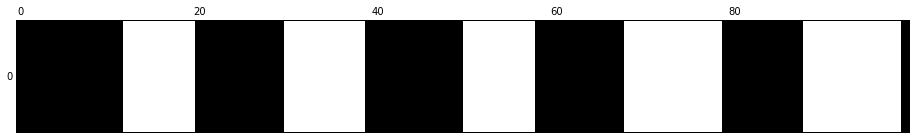

In [8]:
plt.matshow(states[np.newaxis, :], cmap="gray", aspect="auto");

# Make counts

[ 0  0  0  0  0  0  0  0  0  0  0  0 44 48 58 53 38 47 50 47  0  0  1  0  0
  0  0  0  0  1 62 48 54 46 61 51 48 56 58  0  0  0  0  0  0  0  0  0  0  0
 52 54 53 41 49 36 61 50  0  0  0  0  0  0  0  0  0  0 45 58 45 47 45 55 62
 45 58 43 64  0  0  0  0  0  0  0  0  0 60 47 45 47 46 58 53 45 45 57 53  0]


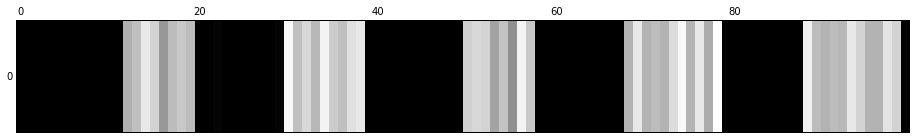

In [9]:
counts = stats.poisson.rvs(rates * dt)

plt.matshow(counts[np.newaxis, :], cmap="gray", aspect="auto")

print counts

# Run inference

In [10]:
import pelt

cplist = pelt.find_changepoints(counts, lam, nu, dt, 2.)

inferred = pelt.calc_state_probs(counts, cplist, lam, nu, dt)

In [11]:
changepoints / dt , np.array(cplist)

(array([ 11.3095624 ,  19.66190965,  29.58543266,  38.02284812,
         49.67895912,  57.83183378,  67.24225904,  78.0745227 ,
         87.89415731,  98.893017  ]),
 array([ 0, 11, 19, 29, 38, 49, 57, 67, 78, 87, 98]))

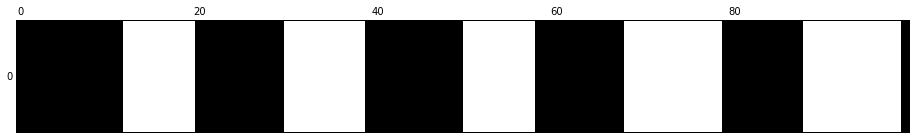

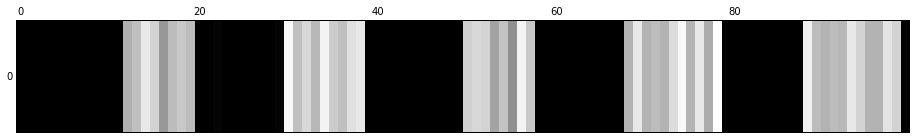

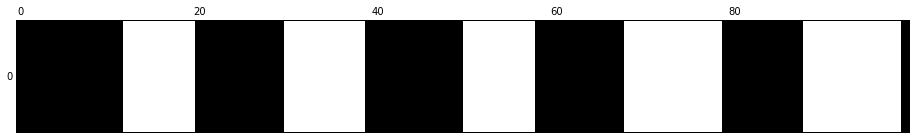

In [12]:
plt.matshow(states[np.newaxis, :], cmap="gray", aspect="auto", clim=(0, 1))
plt.matshow(counts[np.newaxis, :], cmap="gray", aspect="auto")
plt.matshow(inferred[np.newaxis, :], cmap="gray", aspect="auto", clim=(0, 1));